In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
amazon_beauty_products=pd.read_csv('ratings_Beauty.csv')

In [3]:
amazon_beauty_products.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
amazon_beauty_products.groupby('ProductId')['Rating'].mean().sort_values(ascending=False).head()

ProductId
B00LU0LTOU    5.0
B004PUXXNC    5.0
B004PVN74Q    5.0
B004PVNU34    5.0
B004PVO87G    5.0
Name: Rating, dtype: float64

In [5]:
amazon_beauty_products.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head()

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
Name: Rating, dtype: int64

In [6]:
amazon_beauty_products.groupby('ProductId')['Rating'].count().sort_values().head()

ProductId
0205616461    1
B005KDRZCS    1
B005KDU5XO    1
B005KECH48    1
B005KEH11C    1
Name: Rating, dtype: int64

In [7]:
ratings = pd.DataFrame(amazon_beauty_products.groupby('ProductId')['Rating'].mean())
ratings.head()

,Rating
ProductId,
0205616461,5.0
0558925278,4.0
0733001998,4.0
0737104473,1.0
0762451459,5.0


In [8]:
ratings['num of ratings'] = pd.DataFrame(amazon_beauty_products.groupby('ProductId')['Rating'].count())
ratings.head()

,Rating,num of ratings
ProductId,,
0205616461,5.0,1
0558925278,4.0,2
0733001998,4.0,1
0737104473,1.0,1
0762451459,5.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279AD28E888>,
      dtype=object)

<Figure size 720x288 with 0 Axes>

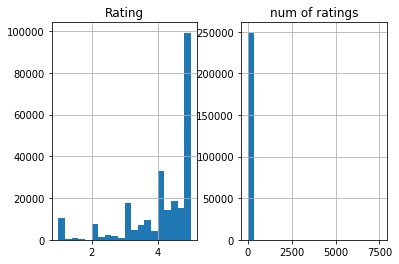

In [9]:
plt.figure(figsize=(10,4))
ratings.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279ADE07208>,
      dtype=object)

<Figure size 720x288 with 0 Axes>

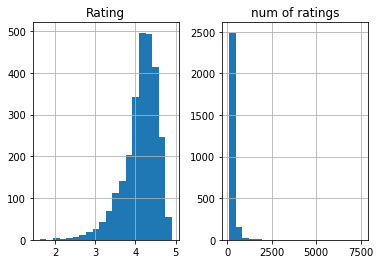

In [10]:
plt.figure(figsize=(10,4))
ratings[ratings['num of ratings']>100].hist(bins=20)

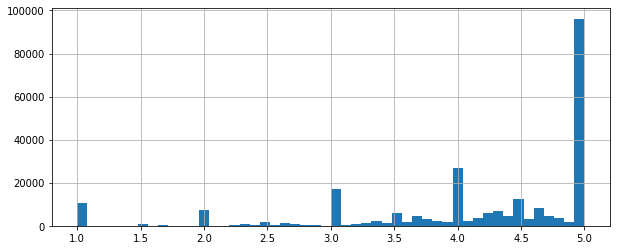

In [11]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=50)

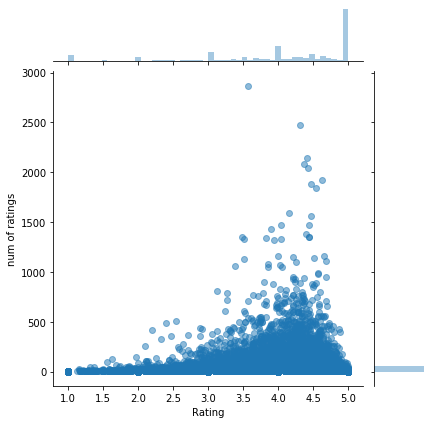

In [12]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings[ratings['num of ratings']<3000],alpha=0.5)

# Recommending Similar Products based on Ratings of users 

Now let's create a matrix that has the user ids on one axis and the product ids on another axis. Each cell will then consist of the rating the user gave to that product. Note there will be a lot of NaN values, because most people have not purchased most of the products.

In [13]:
productmat = amazon_beauty_products.pivot_table(index='UserId',columns='ProductId',values='Rating')
productmat.head()

IndexError: index 1041476259 is out of bounds for axis 0 with size 1041382534

In [14]:
ratings[ratings['num of ratings']>1].count()

Rating            145790
num of ratings    145790
dtype: int64

In [15]:
amazon_beauty_products.count()

UserId       2023070
ProductId    2023070
Rating       2023070
Timestamp    2023070
dtype: int64

In [16]:
amazon_beauty_products['ProductId'].unique()

array(['0205616461', '0558925278', '0733001998', ..., 'B00LP2YB8E',
       'B00LPVG6V0', 'B00LU0LTOU'], dtype=object)

In [17]:
amazon_beauty_products['ProductId'].value_counts()

B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B0012UQIA8       1
B000NRC526       1
B000CCK54C       1
B00016X7Q2       1
B00INK5HX4       1
Name: ProductId, Length: 249274, dtype: int64

Let's remove the products with only one review since they are not very popular within shoppers who rely on reviews to choose their products!

In [18]:
amazon_beauty_products = amazon_beauty_products[amazon_beauty_products['ProductId'].map(amazon_beauty_products['ProductId'].value_counts()) > 100]

In [19]:
amazon_beauty_products.count()

UserId       610726
ProductId    610726
Rating       610726
Timestamp    610726
dtype: int64

In [20]:
productmat = amazon_beauty_products.pivot_table(index='UserId',columns='ProductId',values='Rating')
productmat.head()

ProductId,B00004TMFE,B00004TUBL,B00004TUBV,B00004U9UY,B000050B6U,B000052WYD,B000052WYN,B000052XW5,B000052XZP,B000052YJH,...,B00JX979CQ,B00KAL5JAU,B00KCFAZTE,B00KCTER3U,B00KD73PBQ,B00KHGIK54,B00KHH2VOY,B00KQBR9FM,B00KWFDBKE,B00L5JHZJO
UserId,,,,,,,,,,,,,,,,,,,,,
A00031961JI1CBNV98TW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000325234LCBTFVL1QK4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000622834IP6B056754X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00088021N0VU5Z2UM73L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0010876CNE3ILIM9HV0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's see which products correlate with the product with the most reviews

In [21]:
product_B001MA0QY2_rating = productmat['B001MA0QY2']
product_B001MA0QY2_rating.head()

UserId
A00031961JI1CBNV98TW    NaN
A000325234LCBTFVL1QK4   NaN
A000622834IP6B056754X   NaN
A00088021N0VU5Z2UM73L   NaN
A0010876CNE3ILIM9HV0    NaN
Name: B001MA0QY2, dtype: float64

In [22]:
similar_to_B001MA0QY2=productmat.corrwith(product_B001MA0QY2_rating)

C:\Users\18328\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\18328\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [23]:
corr_B001MA0QY2 = pd.DataFrame(similar_to_B001MA0QY2,columns=['Correlation'])
corr_B001MA0QY2.dropna(inplace=True)
corr_B001MA0QY2.head()

,Correlation
ProductId,
B000052YM7,0.904534
B0000530ED,-1.000000
B00005A9WP,-1.000000
B00005NFBJ,-1.000000
B0000632EN,0.000000


In [24]:
corr_B001MA0QY2 = corr_B001MA0QY2.join(ratings['num of ratings'])
corr_B001MA0QY2.head()

,Correlation,num of ratings
ProductId,,
B000052YM7,0.904534,412
B0000530ED,-1.000000,584
B00005A9WP,-1.000000,430
B00005NFBJ,-1.000000,204
B0000632EN,0.000000,686


In [26]:
corr_B001MA0QY2.sort_values('num of ratings',ascending=False)

,Correlation,num of ratings
ProductId,,
B001MA0QY2,1.000000,7533
B0009V1YR8,0.518751,2869
B0043OYFKU,0.357321,2477
B0000YUXI0,0.620174,2143
B003V265QW,-0.033190,2088
...,...,...
B001NJGARY,-0.500000,107
B008DK8J6G,0.944911,106
B003J48F3I,1.000000,105


In [27]:
corr_B001MA0QY2.sort_values('Correlation',ascending=False)

,Correlation,num of ratings
ProductId,,
B000LXTNMW,1.0,180
B00021DJ32,1.0,355
B000U2AQNY,1.0,207
B002WTC37U,1.0,238
B002Q6UK9M,1.0,276
...,...,...
B0020MMCZW,-1.0,272
B002Y1Y1I0,-1.0,200
B002WTC38O,-1.0,1159


# Conclusion

This simple recommender system recommends products based on the reviews of shoppers with the same taste. However, introducing more information on the product itself would definitely improve the recommendation and help us determine whether the products are really similar or not, specially that beauty products have different desired effects, price, brands, ingredients... based on which the shopper might make their choice of a certain product over another